In [86]:
import os
import sys
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['THEANO_FLAGS'] = 'device=cpu,compiledir_format="ipynb_cpu"'
sys.path.append(os.getcwd()+"/..")
import theano.tensor as T
import theano
import lasagne

from tasks import check
from lasagne import layers as L

from lasagnekit.misc.plot_weights import dispims_color, tile_raster_images
import matplotlib.pyplot as plt
from skimage.io import imsave

from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.manifold import TSNE
from tqdm import tqdm

%matplotlib inline
from IPython.display import Image

import matplotlib.pyplot as plt
from lasagnekit.misc.plot_weights import tile_raster_images
import numpy as np
from lasagnekit.misc.plot_weights import dispims_color
from skimage.io import imsave
from helpers import salt_and_pepper
import lasagne
import pickle
from lasagne import layers

def load_gan_model(filename):
    import dcgan
    
    data = pickle.load(open(filename))
    gen = data['generator']
    discr = data['discriminator']
    return gen, discr

def sample(x):
    return (np.random.uniform(size=x.shape) <= x).astype(np.float32)

def floatX(x):
    return x.astype(np.float32)

def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, max(len(inputs) - batchsize + 1, len(inputs)), batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

def sigmoid(x):
    return 1./(1. + np.exp(-x))

from tools.brushstroke.common import to_grid_of_images, disp_grid
from tools.brushstroke.common import load_model, get_bias, get_scale
from lasagnekit.misc.draw_net import draw_to_file
from IPython.display import SVG

## load model

In [87]:
capsule, data, layers = load_model("../training/program/p2/model.pkl",
                                    kw_load_data={'nb_examples': 200})
c, w, h = layers['input'].shape[1:]

{}
{0: (coord_0_0.W, coord_0_0.b, repr_0_0.W, repr_0_0.b)}
{0: (coord_0_0.W, coord_0_0.b, repr_0_0.W, repr_0_0.b), 1: (coord_0_1.W, coord_0_1.b, repr_0_1.W, repr_0_1.b)}
{0: (coord_0_0.W, coord_0_0.b, repr_0_0.W, repr_0_0.b), 1: (coord_0_1.W, coord_0_1.b, repr_0_1.W, repr_0_1.b)}
{0: (coord_0_0.W, coord_0_0.b, repr_0_0.W, repr_0_0.b), 1: (coord_0_1.W, coord_0_1.b, repr_0_1.W, repr_0_1.b)}
{0: (coord_0_0.W, coord_0_0.b, repr_0_0.W, repr_0_0.b), 1: (coord_0_1.W, coord_0_1.b, repr_0_1.W, repr_0_1.b)}
Loading data...


INFO:tasks:Loading data...


{}
{0: (coord_0_0.W, coord_0_0.b, repr_0_0.W, repr_0_0.b)}
{0: (coord_0_0.W, coord_0_0.b, repr_0_0.W, repr_0_0.b), 1: (coord_0_1.W, coord_0_1.b, repr_0_1.W, repr_0_1.b)}
{0: (coord_0_0.W, coord_0_0.b, repr_0_0.W, repr_0_0.b), 1: (coord_0_1.W, coord_0_1.b, repr_0_1.W, repr_0_1.b)}
{0: (coord_0_0.W, coord_0_0.b, repr_0_0.W, repr_0_0.b), 1: (coord_0_1.W, coord_0_1.b, repr_0_1.W, repr_0_1.b)}
{0: (coord_0_0.W, coord_0_0.b, repr_0_0.W, repr_0_0.b), 1: (coord_0_1.W, coord_0_1.b, repr_0_1.W, repr_0_1.b)}
{}
{0: (coord_0_0.W, coord_0_0.b, repr_0_0.W, repr_0_0.b)}
{0: (coord_0_0.W, coord_0_0.b, repr_0_0.W, repr_0_0.b), 1: (coord_0_1.W, coord_0_1.b, repr_0_1.W, repr_0_1.b)}
{0: (coord_0_0.W, coord_0_0.b, repr_0_0.W, repr_0_0.b), 1: (coord_0_1.W, coord_0_1.b, repr_0_1.W, repr_0_1.b)}
{0: (coord_0_0.W, coord_0_0.b, repr_0_0.W, repr_0_0.b), 1: (coord_0_1.W, coord_0_1.b, repr_0_1.W, repr_0_1.b)}
{0: (coord_0_0.W, coord_0_0.b, repr_0_0.W, repr_0_0.b), 1: (coord_0_1.W, coord_0_1.b, repr_0_1.W, repr_0_

INFO:tasks:Loading the model...


{}
{0: (coord_0_0.W, coord_0_0.b, repr_0_0.W, repr_0_0.b)}
{0: (coord_0_0.W, coord_0_0.b, repr_0_0.W, repr_0_0.b), 1: (coord_0_1.W, coord_0_1.b, repr_0_1.W, repr_0_1.b)}
{0: (coord_0_0.W, coord_0_0.b, repr_0_0.W, repr_0_0.b), 1: (coord_0_1.W, coord_0_1.b, repr_0_1.W, repr_0_1.b)}
{0: (coord_0_0.W, coord_0_0.b, repr_0_0.W, repr_0_0.b), 1: (coord_0_1.W, coord_0_1.b, repr_0_1.W, repr_0_1.b)}
{0: (coord_0_0.W, coord_0_0.b, repr_0_0.W, repr_0_0.b), 1: (coord_0_1.W, coord_0_1.b, repr_0_1.W, repr_0_1.b)}
Compiling the model...


INFO:tasks:Compiling the model...


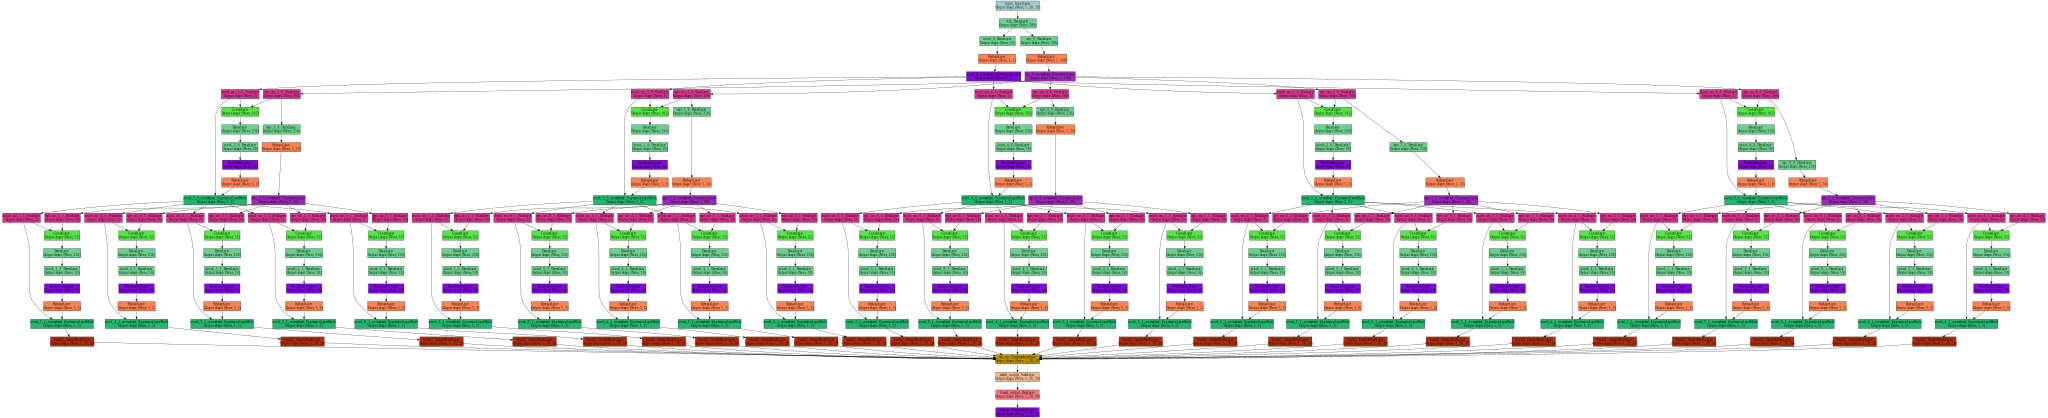

In [88]:
draw_to_file(L.get_all_layers(layers['output']), 'out.svg')
SVG('out.svg')

In [3]:
for l in layers:
    print(l)

input
hid
repr_0
repr_0_normalized
coord_0
coord_0_normalized
coord_0_0
coord_0_0_normalized
repr_0_0
repr_0_0_normalized
brush1
coord_1_0
coord_1_0_normalized
repr_1_0
repr_1_0_normalized
coord_2_0
coord_2_0_normalized
repr_2_0
repr_2_0_normalized
coord_3_0
coord_3_0_normalized
repr_3_0
repr_3_0_normalized
coord_4_0
coord_4_0_normalized
repr_4_0
repr_4_0_normalized
coord_5_0
coord_5_0_normalized
repr_5_0
repr_5_0_normalized
raw_out
scaled_output
biased_output
output


(128, 784)


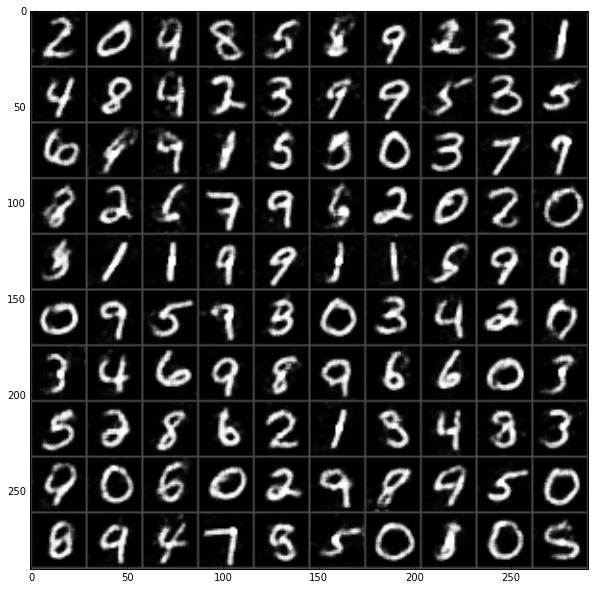

In [89]:
data.load()
print(data.X.shape)
X = data.X[0:100]
X = capsule.preprocess(X)
Xrec = capsule.reconstruct(X)
fig = plt.figure(figsize=(10,10))
plt.imshow(disp_grid(Xrec, border=1, bordercolor=(0.3,0.3,0.3)))

## ProgramNeural network

In [90]:
X_t = T.tensor4()
get_coords = theano.function([X_t], L.get_output(layers['coord_0_normalized'], X_t))
get_repr = theano.function([X_t], L.get_output(layers['repr_0_normalized'], X_t))

C = T.tensor3()
R = T.tensor3()
render = theano.function(
    [C, R],
    L.get_output(layers['output'], 
                 {layers['coord_0_normalized']: C, layers['repr_0_normalized']: R}, 
                 deterministic=True)
)

In [ ]:
#get_coords_1 = theano.function([X_t], L.get_output(layers['coord_1_0_normalized'], X_t))
#get_rel_coords_1 = theano.function([X_t], L.get_output(layers['coord_5_0'], X_t))

In [91]:
X = data.X[0:100]
X = capsule.preprocess(X)
coords = get_coords(X)
reprs = get_repr(X)

In [259]:
coords_ = coords.copy()
reprs_ = reprs.copy()
reprs_[:,5:]=0

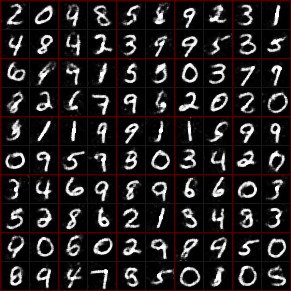

In [260]:
Xrec = render(coords_, reprs_)
img = disp_grid(Xrec, border=1, bordercolor=(0.3,0,0))
imsave('out.png', img)
Image('out.png', width=400, height=400)

## Only come here To check vertebrate  convnets

In [ ]:
code_layers = ['wta1', 'wta3', 'wta5']
X_t = T.tensor4()
encode = theano.function(
    [X_t], 
    [L.get_output(layers[cc], X_t) for cc in code_layers]
)
code_t = [T.tensor4() for _ in code_layers]
decode = theano.function(
    code_t,
    L.get_output(layers['output'], {layers[name]: t for name, t in zip(code_layers, code_t)})
)

In [ ]:
get_backs = theano.function(
    [X_t], 
    L.get_output(layers['wta3'], {layers['wta2']: X_t})
)

In [ ]:
X = data.X[0:100]
X=capsule.preprocess(X)

In [ ]:
C = encode(X)
c = C[1]
c_zero = np.zeros_like(c)
example = 50
rest = np.arange(c.shape[1])
mask = np.zeros(c.shape[1]).astype(np.bool)
mask[0] = True
c[example, ~mask]=0
back = get_backs(c)
back_zero = get_backs(np.zeros_like(c))
B = back #- back_zero
img = disp_grid(B[example][:, np.newaxis, :, :], border=1, bordercolor=(0.3,0,0))
plt.imshow(img)

In [ ]:
C = encode(X)
Xrec = decode(*C)

In [ ]:
v = C[0].flatten()
plt.hist(v[v>0])

In [ ]:
M = C[0]
M = M.max(axis=(2,3))
M = M+np.random.normal(0, 0.001)
M = M.T
M = np.abs(np.corrcoef(M))
print(M)
fig = plt.figure(figsize=(10,10))
plt.imshow(M, cmap='gray', interpolation='none')
cb = plt.colorbar()
plt.show()

In [ ]:
C = list(encode(X))
cc = [0,1,2]#include these
for i in set(range(len(C))) - set(cc):
    C[i][:] = 0

C_zeros = [np.zeros_like(c) for c in C]
M = []#change these
for i in M:
    F = C[i].shape[1]
    W = C[i].shape[2]
    H = C[i].shape[3]
    N = min(C[i].shape[0], F)
    C[i][np.arange(N), 
         np.arange(N), 
         #np.random.randint(0, W, size=N), 
        #np.random.randint(0, H, size=N)
         2,
         2,
    ] = 50

fig = plt.figure(figsize=(20, 20))
Xrec = decode(*C)
X_rec_zero = decode(*C_zeros)

res = Xrec - X_rec_zero
recons = dispims_color(res.transpose((0, 2, 3, 1)) * np.ones((1, 1, 1, 3)), border=1, bordercolor=(0.5,0.5,0.5))
plt.imshow(recons)

In [ ]:
for i in range(len(C)):
    print(C[i].shape)

## viz features

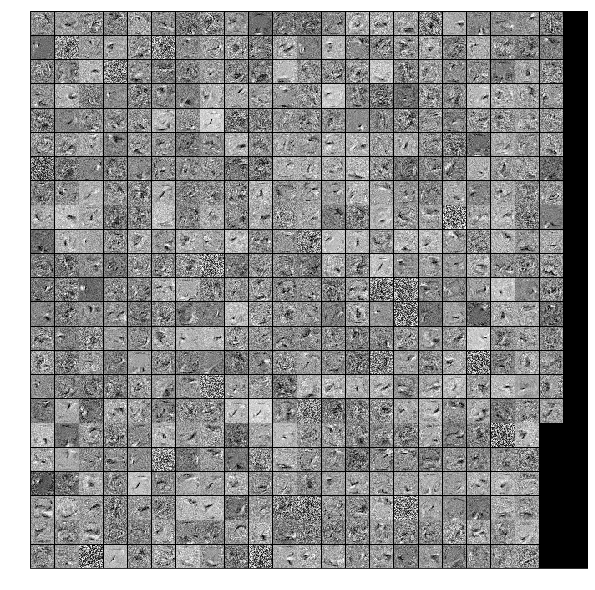

(500, 500)
(500, 10)
(256, 10)
(100, 250)
(256, 10)
(50, 50)
(256, 10)
(50, 50)
(256, 10)
(50, 50)
(256, 10)
(50, 50)
(256, 10)
(50, 50)
(256, 10)
(100, 250)
(256, 10)
(100, 250)
(256, 10)
(100, 250)
(256, 10)
(100, 250)


In [196]:
nbpixels = 28*28
for name, layer in layers.items():
    if hasattr(layer, "W"):
        W = layer.W.get_value()
        if len(W.shape)==2 and (W.shape[0] == nbpixels or W.shape[1] == nbpixels):
            nbpixels = c*w*h
            if W.shape[0] == nbpixels:
                W = W.T
            W = W.reshape((W.shape[0], c, w, h))
            W = W.transpose((0, 2, 3, 1))
            W = W * np.ones((1, 1, 1, 3))
        elif len(W.shape) == 4 and W.shape[1] in (1, 3):
            W = W.transpose((0, 2, 3, 1))
            W = W * np.ones((1, 1, 1, 3))
        elif len(W.shape) == 4 and W.shape[0] in (1, 3):
            W = W.transpose((1, 2, 3, 0))
            W = W * np.ones((1, 1, 1, 3))
        else:
            print(W.shape)
            continue
        fig = plt.figure(figsize=(10, 10))
        plt.axis('off')
        img = dispims_color(W, border=1)
        plt.imshow(img, interpolation='none')
        plt.show()

## iterative refinement

In [197]:
from data import load_data
c=1
if c == 3:
    external_data = load_data(dataset='lfw', w=w, h=h)
    external_data = external_data.X
    external_data = external_data.reshape((external_data.shape[0], c, w, h))
    
if c == 1:
    from lasagnekit.datasets.rescaled import Rescaled
    external_data = load_data(dataset='digits', w=w, h=h)
    external_data = Rescaled(external_data, (w, h))
    external_data.load()
    external_data = external_data.X[0:100]
    external_data = external_data.reshape((external_data.shape[0], c, w, h))
    external_data = external_data.astype(np.float32)

In [208]:
seed = 42
#seed = np.random.randint(1, 100)
np.random.seed(seed)
c=1
N = 100 # nb of examples to generate
nb_iter = 20 # nb iterations for generation

do_sample = False
do_binarize = True
do_noise = False
noise_pr = 0.7
do_gaussian_noise = True
gaussian_noise_std = 0.1
thresh = 'moving'

init_by_external = False
whitepx_ratio = 0.15
if init_by_external:
    s = floatX(external_data[0:N])
else:
    s = floatX(np.random.uniform(0, 1, size=(N, c, w, h)))

samples = []
samples.append(s.copy()[np.newaxis, :, :, :, :])

nz = np.random.normal(0, gaussian_noise_std, size=s.shape).astype(np.float32)
loss = []
nz = np.random.normal(0, gaussian_noise_std, size=s.shape).astype(np.float32)
for i in tqdm(range(nb_iter)):
    sprev = s      
    if do_noise:
        s = (np.random.uniform(size=s.shape) <= (1 - noise_pr)) * s
        s = s.astype(np.float32)
    if do_gaussian_noise:
        #nz = np.random.normal(0, gaussian_noise_std, size=s.shape).astype(np.float32)
        s += nz
    s = (capsule.reconstruct(s))

    if do_sample:
        s = np.random.binomial(n=1, p=s, size=s.shape).astype('float32')# binarize by sampling
    if do_binarize:
        if thresh == 'moving':
            vals = s.flatten()
            vals = vals[np.argsort(vals)]
            thresh_ = vals[-int(whitepx_ratio * len(vals)) - 1]
        else:
            thresh_ = thresh
        s = s > thresh_
    s = s.astype(np.float32)
    samples.append(s.copy()[np.newaxis, :, :, :, :])

    score = np.abs(s - sprev).sum()
    if score == 0:
        print('end')
        break
    #print(score)
    loss.append(score)
print(score)
samples = np.concatenate(samples, axis=0) # all samples from all timesteps in an array

125758.0


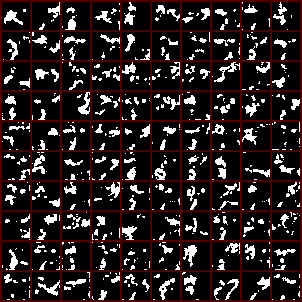

In [209]:
# show images generated at last iteration
for s in (samples[-1],):
    s = s * np.ones((1, 3, 1, 1))
    s = s.transpose((0, 2, 3, 1))
    img = dispims_color(s, border=2, bordercolor=(0.3, 0, 0), )
    imsave('out.png', img)
Image('out.png')

In [ ]:
# sample samples and iterations
fig = plt.figure(figsize=(20, 20))
sw, sh = samples.shape[0:2]
samples_ = samples.copy()
samples_ = samples_.reshape((sw*sh, c, w, h))
samples_ = samples_.transpose((0, 2, 3, 1))
samples_ = samples_ * np.ones((1, 1, 1, 3))
img = dispims_color(samples_, shape=(sw, sh), border=1, bordercolor=(0.3,0,0))
imsave('out.png', img)
Image('out.png')

In [ ]:
import os
from scripts.imgtovideo import imgs_to_video
from tools.brushstroke.common import embed_video
imgs = []
for s in samples:
    img = dispims_color(s.transpose((0, 2, 3, 1)) * np.ones((1, 1, 1, 3)))
    imgs.append(img)
if os.path.exists('out.mp4'):
    os.remove('out.mp4')
imgs_to_video(imgs, out='out.mp4', verbose=1, framerate=1, rate=1)
embed_video('out.mp4')

## Video of the last row for brush stroke

In [ ]:
samples[-2].shape

In [ ]:
X = T.tensor4()
encode = theano.function(
    [X], 
    L.get_output(layers['brush'], X)
)

encode_coords = theano.function(
    [X],
    L.get_output(layers['coord'], X)
)

In [ ]:
bias = layers['bias'].b.get_value()

In [ ]:
X = capsule.preprocess(samples[-2][0:16*16])
xx = X.copy()
xx = xx.transpose((0, 2, 3, 1)) * np.ones((1, 1, 1, 3))
source = dispims_color(xx, border=0)

    
y = encode(X)

imgs = []
for t in range(y.shape[1]):
    yy = y[:, t]
    yy = yy[:, :, :, None] * np.ones((1, 1, 1, 3))
    yy = sigmoid(yy+bias) > 0.5
    yy = yy.astype(np.float32)
    img = dispims_color(yy, border=0) 
    plt.imshow(img)
    imgs.append(img)

seq_imgs = imgs

In [ ]:
imgs = [np.zeros_like(imgs[0])] + imgs
img_aggreg = np.zeros((img.shape[0], img.shape[1]*2, 3))
img_aggreg[0:source.shape[0], 0:source.shape[1]] = source
img_aggreg[:, source.shape[1]:source.shape[1]+img.shape[1]] = img
imsave('out.png', img_aggreg)

In [ ]:
import os
if os.path.exists('out.mp4'):
    os.remove('out.mp4')
imgs_to_video(imgs, out='out.mp4', verbose=1, framerate=8, rate=8)

## project into feature space

In [ ]:
hid = []
d = []
for i in range(10):
    X = data.X
    data.load()
    d.append(capsule.preprocess(X).transpose((0, 2 ,3 , 1))  * np.ones((1, 1, 1, 3)))
    C = encode(capsule.preprocess(X))
    if type(C) == list:
        C = [c.reshape(c.shape[0], -1) for c in C]
        #C = C[-1]
        C = np.concatenate(C, axis=1)        
    hid.append(C)
d = np.concatenate(d, axis=0)
hid = np.concatenate(hid, axis=0)
hid = hid.reshape((hid.shape[0], -1))
print(hid.shape)

In [ ]:
#mf = PCA(n_components=2)
mf = TSNE(n_components=2)
h2d = mf.fit_transform(hid)

In [ ]:
#mf = PCA(n_components=2)
mf = TSNE(n_components=2)
d2d = mf.fit_transform(d.reshape(d.shape[0], -1))

In [ ]:
from tools.viz.image_scatter import image_scatter
img = image_scatter(h2d, d, 80)
imsave('out_scatter.png', img)
Image('out_scatter.png')

In [ ]:
img = image_scatter(d2d, d, 20)
imsave('out_scatter_data.png', img)
Image('out_scatter_data.png')

## transferability

In [ ]:
X_transf_orig = external_data[0:100].copy()


im = X_transf_orig.copy().astype(np.float32)
imgs = []
for i in tqdm(range(100)):
    im = im + (capsule.reconstruct(im) - im)
    imgs.append(im.copy())
    
from scripts import imgtovideo
x = []
for img in imgs:
    img = img * np.ones((1, 3, 1, 1))
    img = img.transpose((0, 2, 3, 1))
    x.append(dispims_color(img))

In [ ]:
!rm out.mp4
imgs_to_video(x, out='out.mp4', verbose=1)

In [ ]:
embed_video('out.mp4')

## forced generation

In [ ]:
gen, discr = load_gan_model('/home/mcherti/work/code/lasagne-dcgan/fonts.pkl')

## rnn

In [ ]:
X = T.tensor4()
Xinit = X
nb_steps = 4
for i in range(nb_steps):
    X = L.get_output(layers['output'], X)
score = L.get_output(discr, X)
loss = (score).mean()
grad = theano.grad(loss, Xinit)
get_grad = theano.function([Xinit], grad)
get_loss = theano.function([Xinit], loss)
get_gen = theano.function([Xinit], X)

In [ ]:
import scipy
def eval_loss(x0):
    x0 = x0.reshape((nb, c, w, h))
    return -get_loss(x0.astype(np.float32)).astype('float64')

def eval_grad(x0):
    x0 = x0.reshape((nb, c, w, h))
    return get_grad(x0.astype(np.float32)).flatten().astype('float64')

In [ ]:
nb = 100
x = np.random.uniform(size=(nb, c, w, h))
x = x.astype(np.float32)
for i in range(40):
    #x, _, _ = scipy.optimize.fmin_l_bfgs_b(eval_loss, x.flatten(), fprime=eval_grad, maxfun=1)
    #x = x.reshape((nb, c, w, h)).astype(np.float32)
    x += 0.1 * get_grad(x)
    print(get_loss(x))

In [ ]:
img = get_gen(x) * np.ones((1, 3, 1, 1))
img = img.transpose((0, 2, 3, 1))
fig = plt.figure(figsize=(10, 10))
img = dispims_color(img, border=1, bordercolor=(10, 10, 10))
plt.imshow(img)

In [ ]:
from datakit.mnist import MNIST
data = MNIST('train')
data.load()
X_train = data.X.reshape((data.X.shape[0], 1, 28, 28))
y_train = data.y
def transform(X):
    h = []
    for i in range(0, X.shape[0], 128):
        C = encode(X[i:i + 128])
        hh = np.concatenate([cc.max(axis=(2, 3)).reshape((cc.shape[0], -1)) for cc in C], axis=1)      
        h.append(hh)
    h = np.concatenate(h, axis=0)
    return h

X_train = transform(X_train)

data = MNIST('test')
data.load()
X_test = data.X.reshape((data.X.shape[0], 1, 28, 28))
X_test = transform(X_test)
y_test = data.y

In [ ]:
Xrec = capsule.reconstruct(data.)

## VAE

In [ ]:
Z = T.matrix()
X = T.tensor4()
sample = theano.function([Z], L.get_output(layers['output'], {layers['z_sample']: Z}))

pred_z = theano.function([X], L.get_output(layers['z_mu'], X))

z_size = layers['z_sample'].output_shape[1]

In [ ]:
x = data.train.X[0:5000]
y= data.train.y[0:5000]
z = pred_z(capsule.preprocess(x))
fig = plt.figure(figsize=(20, 10))

cmap = plt.get_cmap('jet', 10)
cmap.set_under('gray')

r_inp = np.random.uniform(size=(100, 784)).astype(np.float32)
r = pred_z(capsule.preprocess(r_inp))
plt.scatter(z[:, 0], z[:, 1], c=y, cmap=cmap)
plt.scatter(r[:, 0], r[:, 1], c=[10]*len(r), cmap=cmap, s=100)
plt.colorbar()

In [ ]:
nb = 10*10
if z_size == 2:
    x = np.linspace(-1, 1, np.sqrt(nb))
    y = np.linspace(-1, 1, np.sqrt(nb))
    x, y = np.meshgrid(x, y)
    x = x.flatten()
    y = y.flatten()
    z_samples = np.vstack((x, y)).T
else:
    z_samples = np.random.normal(0, 0.99, size=(nb, z_size))
    
z_samples = z_samples.astype(np.float32)
x_samples = sample(z_samples)
x_samples = x_samples.transpose((0, 2, 3, 1)) * np.ones((1, 1, 1, 3))
fig = plt.figure(figsize=(10, 10))

img = dispims_color(x_samples)

In [ ]:
imsave('out.png', img)
Image('out.png')

### GAN

In [ ]:
from skimage.transform import resize
import theano

In [ ]:
gen, discr = load_gan_model('../tools/mnist.pkl')

In [ ]:
X = T.tensor4()
discr_fn = theano.function([X], L.get_output(discr, X))

Z = T.matrix()
gen_fn = theano.function([Z], L.get_output(gen, Z))

In [ ]:
z_grad_fn = theano.function([X, Z], theano.grad( ((L.get_output(gen, Z)-X)**2).mean()  , Z))

In [ ]:
x_grad_n = theano.function([X], theano.grad(L.get_output(discr, X).mean(), X))

In [ ]:
def resize_set(x, w, h, **kw):
    x_out = np.empty((x.shape[0], 1, w, h))
    for i in range(len(x)):
        x_out[i, 0] = resize(x[i, 0], (w, h), **kw)
    return x_out.astype(np.float32)

In [ ]:
print(gen.output_shape)

In [ ]:
x = np.random.uniform(size=(9, 1, 28, 28)).astype(np.float32)
Z_of_X = np.random.uniform(-1, 1, size=(x.shape[0], 100)).astype(np.float32)


for i in range(20):
    #x += np.random.normal(0, 0.5, size=x.shape)
    x = capsule.reconstruct(x)
    x = x.astype(np.float32)
    x = resize_set(x, 32, 32)
    if True:
        z_rec = np.random.uniform(-1, 1, size=(x.shape[0], 100)).astype(np.float32)
        for _ in range(10):
            g = z_grad_fn(x, z_rec)
            z_rec -= 0.001*g
        
        gen = gen_fn(z_rec)
        gen =- gen.min(axis=0, keepdims=True)
        gen /= gen.max(axis=0, keepdims=True)
        x = x + (x - gen)
    if False:
        for _ in range(30):
            g = x_grad_n(x)
            x += 0.001*g
    x -= x.min(axis=(1, 2, 3), keepdims=True)
    x /= x.max(axis=(1, 2, 3), keepdims=True) 

    #x -= x.min(axis=0, keepdims=True)
    #x /= x.max(axis=0, keepdims=True) 

    x = resize_set(x, 28, 28, preserve_range=True)
    
    #x = x > 0.3
    x = x.astype(np.float32)

#x = resize_set(x, 32, 32)
print((discr_fn(x)).flatten().mean())

In [ ]:
img =  dispims_color(x.transpose((0, 2, 3, 1)) * np.ones((1, 1, 1, 3)))
imsave('out.png', img)
Image('out.png')